## Keras

This uses a Long Short-Term Memory (LSTM) model that is taught in the tutorial in the Bibliography below. Before we get into the explaination of what a LSTM is, it is important to understand what a Recurrent Neural Network is and how it works. 

### Recurrent Neural Network (RNN)

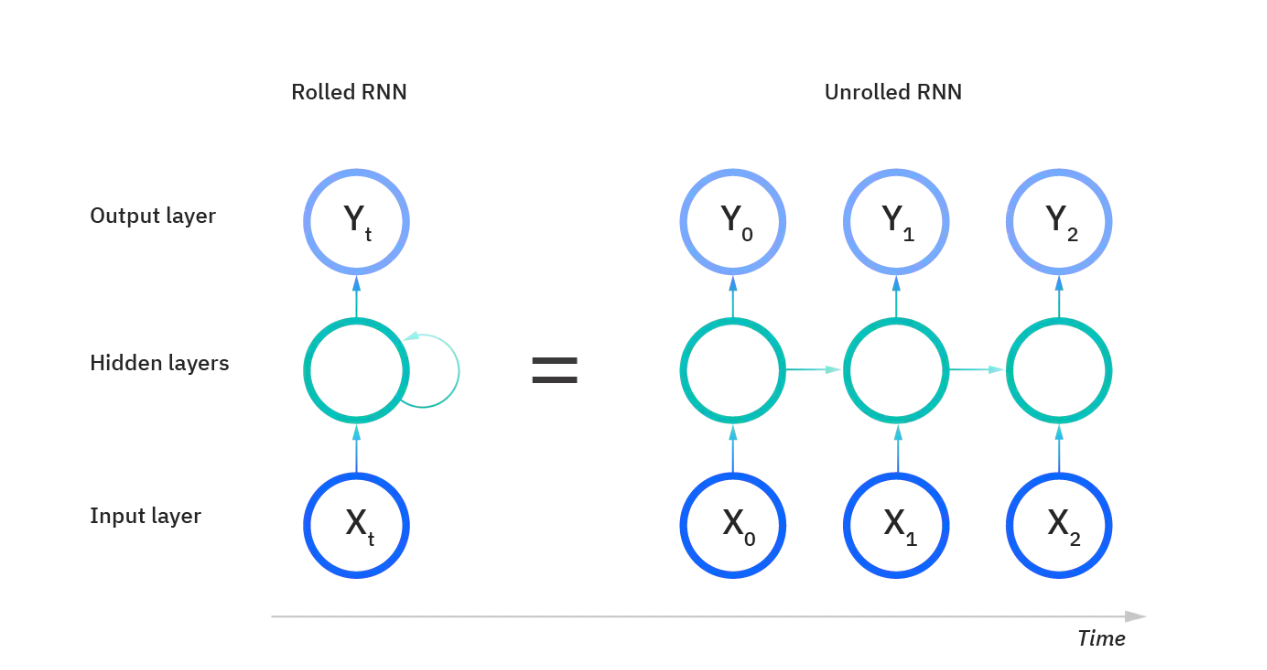

RNNs create layers of information that have been fed into the model from previous inputs. An easy way to understand this is using phrases in the model, and using an RNN to predict words in the phrase as the phrase goes on. In this example, we will use the phrase "as hot as two rats having sex in a sock." This phrase barely makes any sense for a human to read, and is in fact nonsensical wihout having prior knowledge of the previous words as the phrase goes on. For a RNN to predict the words as they go on, it inputs data into previously learnt layers, compares it, and predicts the next word/number. In the layers there are gates that allow new information in, information to be stored, and information to be deleted. In this way the model is able to remember things that it has just been fed, but not things that it learnt a long time ago. 
'
### Long Short-Term Memory (LSTM)

How LSTMs differ is that they are able to allow the long term gradient built by the model to flow through it unchanged. This means that you can use it for data like stock prices and so on that go up and down. For an RNN to be put through a dataset like the stock prices one, the model would train on the data that it has just seen and change the model each time. This would eventaully drive the gradient to zero, or drive it to infinity, making the model less and less useful as time goes on. LSTMs solve this problem as they have hidden cells in the layers that remember lessons from previous data. 

### Keras

Greek for horn apparently. Keras uses tensorflow and is an API. It is a way of using tensorflow that is super easy and gives Keras a wider range of applications. 

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

In [56]:
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

In [310]:
df = pd.read_csv('C:/Users/crump/Documents/University/755 Data Analytics/jpx_tokyo_se_prediction/train_files/stock_prices.csv' )
df.head()

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730
1,20170104_1332,2017-01-04,1332,568.0,576.0,563.0,571.0,2798500,1.0,NaN,False,0.012324
2,20170104_1333,2017-01-04,1333,3150.0,3210.0,3140.0,3210.0,270800,1.0,NaN,False,0.006154
3,20170104_1376,2017-01-04,1376,1510.0,1550.0,1510.0,1550.0,11300,1.0,NaN,False,0.011053
4,20170104_1377,2017-01-04,1377,3270.0,3350.0,3270.0,3330.0,150800,1.0,NaN,False,0.003026


In [312]:
df = df
df1 = df
#df1 = df1[df['SecuritiesCode'].isin(secs)]
df1
df1=df1.iloc[:,2:8]
df1

,SecuritiesCode,Open,High,Low,Close,Volume
0,1301,2734.0,2755.0,2730.0,2742.0,31400
1,1332,568.0,576.0,563.0,571.0,2798500
2,1333,3150.0,3210.0,3140.0,3210.0,270800
3,1376,1510.0,1550.0,1510.0,1550.0,11300
4,1377,3270.0,3350.0,3270.0,3330.0,150800
...,...,...,...,...,...,...
2332526,9990,514.0,528.0,513.0,528.0,44200
2332527,9991,782.0,794.0,782.0,794.0,35900
2332528,9993,1690.0,1690.0,1645.0,1645.0,7200
2332529,9994,2388.0,2396.0,2380.0,2389.0,6500


In [313]:
secs = [1377]


df = df[df['SecuritiesCode'].isin(secs)]
df.Close=df.Close.ffill()
df = df['Close'].values
df = df.reshape(-1, 1)

df

array([[3330.],
       [3305.],
       [3315.],
       ...,
       [3135.],
       [3110.],
       [3170.]])

In [257]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

In [258]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)

In [259]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

array([[2742.],
       [2738.],
       [2740.],
       ...,
       [2911.],
       [2933.],
       [2982.]])

In [260]:
#x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.4)
#x_train.shape
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

In [261]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [262]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [263]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [264]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [269]:

model.fit(x_train, y_train, epochs=50, batch_size=32)
model.save('stock_prediction.h5')

Epoch 1/50
29/29 [==============================] - 7s 118ms/step - loss: 0.0110
Epoch 2/50
29/29 [==============================] - 3s 114ms/step - loss: 0.0109
Epoch 3/50
29/29 [==============================] - 3s 113ms/step - loss: 0.0089
Epoch 4/50
29/29 [==============================] - 3s 114ms/step - loss: 0.0086
Epoch 5/50
29/29 [==============================] - 3s 113ms/step - loss: 0.0077
Epoch 6/50
29/29 [==============================] - 3s 113ms/step - loss: 0.0073
Epoch 7/50
29/29 [==============================] - 3s 114ms/step - loss: 0.0065
Epoch 8/50
29/29 [==============================] - 3s 113ms/step - loss: 0.0075
Epoch 9/50
29/29 [==============================] - 3s 114ms/step - loss: 0.0071
Epoch 10/50
29/29 [==============================] - 3s 113ms/step - loss: 0.0059
Epoch 11/50
29/29 [==============================] - 3s 114ms/step - loss: 0.0062
Epoch 12/50
29/29 [==============================] - 3s 113ms/step - loss: 0.0081
Epoch 13/50
29/29 [======

In [270]:
model = load_model('stock_prediction.h5')

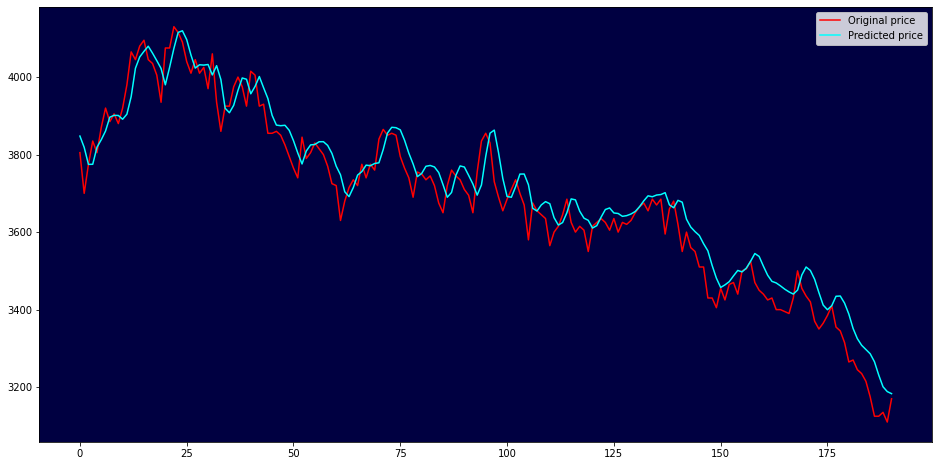

In [281]:
#predictions = model.predict(x_test)
#predictions = scaler.inverse_transform(predictions)
#y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

#fig, ax = plt.subplots(figsize=(16,8))
#ax.set_facecolor('#000041')
#ax.plot(y_test_scaled, color='red', label='Original price')
#plt.plot(predictions, color='cyan', label='Predicted price')
#plt.legend()

## Conclusion

This is a viable method for prediction. This model can be used to apply to all stocks on the exchange and rank them. To do this requires a lot of computing power that my microsoft surface does not contain. However, this model was used on the Kaggle API to predict the price of stocks, however with lower sensitivity in order for it to actually work. 

How to improve this. 

1. Make it more efficient. I don't currently possess the expertise to do that, however I would imagine there is a more effient way to package this. 


2. Feed more data. This is easy enough to do, and would require little effort. 


3. Put on a bigger GPU and increase the sensitivity. 

## Bibliography

https://www.section.io/engineering-education/stock-price-prediction-using-python/

https://www.ibm.com/cloud/learn/recurrent-neural-networks

https://en.wikipedia.org/wiki/Long_short-term_memory

https://keras.io/about/